# Calculate sand proportion

We'd like to compute a running-window sand log, given some striplog.

These are some sand beds:

In [7]:
text = """top,base,comp number
24.22,24.17,20
24.02,23.38,19
22.97,22.91,18
22.67,22.62,17
21.23,21.17,16
19.85,19.8,15
17.9,17.5,14
17.17,15.5,13
15.18,14.96,12
14.65,13.93,11
13.4,13.05,10
11.94,11.87,9
10.17,10.11,8
7.54,7.49,7
6,5.95,6
5.3,5.25,5
4.91,3.04,4
2.92,2.6,3
2.22,2.17,2
1.9,1.75,1"""

## Make a striplog

/home/matt/miniconda3/envs/welly/lib/python3.9/site-packages/striplog/striplog.py:512: UserWarning: No lexicon provided, using the default.
  warnings.warn(w)


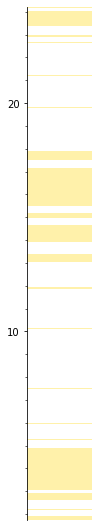

In [8]:
from striplog import Striplog, Component

s = Striplog.from_csv(text=text)

s.plot(aspect=5)

In [9]:
s[0]

Interval({'top': Position({'middle': 24.22, 'units': 'm'}), 'base': Position({'middle': 24.17, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'number': 20.0})]})

## Make a sand flag log

We'll make a log version of the striplog:

In [10]:
start, stop, step = 0, 25, 0.01

L = s.to_log(start=start, stop=stop, step=step)

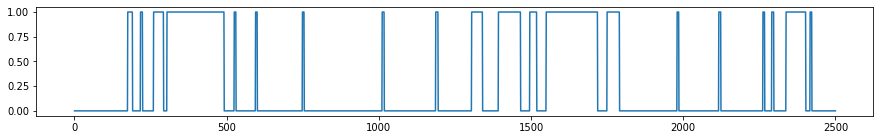

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 2))
plt.plot(L)

## Convolve with running window

Convolution with a boxcar filter computes the mean in a window.

(-5.0, 105.0)

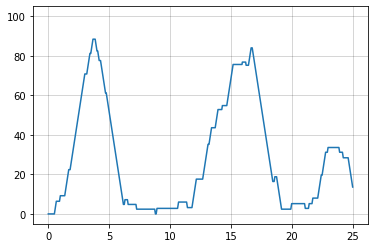

In [12]:
import numpy as np

window_length = 2.5  # metres.

N = int(window_length / step)
boxcar = 100 * np.ones(N) / N

z = np.linspace(start, stop, L.size)
prop = np.convolve(L, boxcar, mode='same')

plt.plot(z, prop)
plt.grid(c='k', alpha=0.2)
plt.ylim(-5, 105)

## Write out as CSV

Here's the proportion log we made:

In [17]:
z_prop = np.stack([z, prop], axis=1)
z_prop.shape

(2501, 2)

Save it with NumPy (or you could build up a Pandas DataFrame)...

In [18]:
np.savetxt('prop.csv', z_prop, delimiter=',', header='elev,perc', comments='', fmt='%1.3f')

Check the file looks okay with a quick command line check (`!` sends commands to the shell).

In [20]:
!head prop.csv

elev,perc
0.000,0.000
0.010,0.000
0.020,0.000
0.030,0.000
0.040,0.000
0.050,0.000
0.060,0.000
0.070,0.000
0.080,0.000


## Plot everything together

Text(0.5, 1.0, '% sand, 2.5 m')

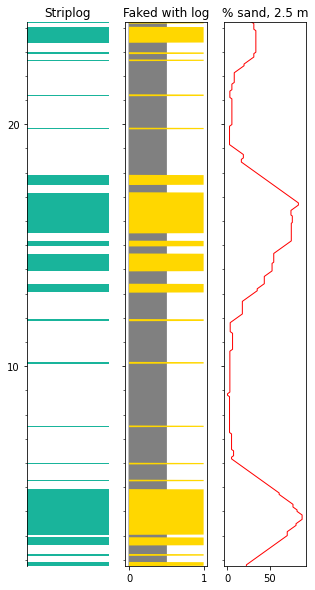

In [22]:
fig, ax = plt.subplots(figsize=(5, 10), ncols=3, sharey=True)

# Plot the striplog.
s.plot(ax=ax[0])
ax[0].set_title('Striplog')

# Fake a striplog by plotting the log... it looks nice!
ax[1].fill_betweenx(z, 0.5, 0, color='grey')
ax[1].fill_betweenx(z, L, 0, color='gold', lw=0)
ax[1].set_title('Faked with log')

# Plot the sand proportion log.
ax[2].plot(prop, z, 'r', lw=1)
ax[2].set_title(f'% sand, {window_length} m')

## Make a histogram of thicknesses

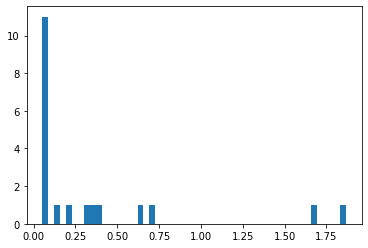

In [33]:
thicks = [iv.thickness for iv in s]

_ = plt.hist(thicks, bins=51)